In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
from deep_translator import GoogleTranslator
from textblob import TextBlob

In [ ]:
web = 'https://twitter.com/search?q=इलेक्टोरल'
path = "/Users/khush/Downloads/chromedriver_mac_arm64/chromedriver"
driver = webdriver.Chrome()
driver.get(web)
driver.maximize_window()
time.sleep(6)

username_field = driver.find_element("xpath", "//input[@name='text']")
username_field.send_keys("@username")  # Replace 'your_username' with your actual username

next_button = driver.find_element("xpath", '//div[@role="button"]//span[text()="Next"]')
next_button.click()
time.sleep(3)

password_field = driver.find_element("xpath", "//input[@name='password']")
password_field.send_keys("password")  # Replace 'YourPassword' with your actual password

login_button = driver.find_element("xpath", "//div[@role='button']//span[text()='Log in']")
login_button.click()
time.sleep(3)

def get_tweet(element):
    try:
        user = element.find_element("xpath", ".//*[contains(text(), '@')]").text
        text = element.find_element("xpath", ".//div[@lang]").text
        datetime = element.find_element("xpath", ".//time").get_attribute("datetime")
        tweet_data = [user, text, datetime]
        return tweet_data
    except Exception as e:
        print(f"Error: {e}")
        return None

user_data = []
text_data = []
datetime_data = []
tweet_ids = set()

scrolling = True
while scrolling:
    tweets = WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.XPATH, "//article")))
    for tweet in tweets[-15:]:
        tweet_list = get_tweet(tweet)
        if tweet_list:
            tweet_id = " • ".join(tweet_list)
            if tweet_id not in tweet_ids:
                tweet_ids.add(tweet_id)
                user_data.append(tweet_list[0])
                text_data.append(tweet_list[1])
                datetime_data.append(tweet_list[2])
    if len(tweet_ids) >= 50:
        break

    last_height = driver.execute_script("return document.body.scrollHeight")
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        scrolling = False
    else:
        last_height = new_height

driver.quit()

# Creating DataFrame
df = pd.DataFrame({"User": user_data, "Text": text_data, "Datetime": datetime_data})

In [21]:
df.to_csv("tweets.csv", index=False)

In [4]:
df = pd.read_csv("/Users/khush/Downloads/tweets.csv")

In [5]:
new_df = df.copy()
new_df['Datetime'] = pd.to_datetime(new_df['Datetime'])
new_df.set_index('Datetime', inplace=True)
new_df.drop('User', axis=1, inplace=True)
new_df['Text'] = new_df['Text'].apply(lambda x: GoogleTranslator(source='hi', target='en').translate(x))
new_df['Text'] = new_df['Text'].str.replace('\n', ' ')
new_df.head()

,Text
Datetime,
2024-03-18 18:02:19+00:00,Electoral bonds are opaque from every angle #R...
2024-03-22 16:27:05+00:00,call the railway minister immediately Get them...
2024-03-23 12:44:09+00:00,"Apart from electoral bonds, there is another s..."
2024-03-22 13:12:53+00:00,"The world's biggest extortion racket, which re..."
2024-03-20 08:43:50+00:00,"Earn virtue by buying electoral bonds, Get fre..."


In [6]:
#sentiment analysis

new_df['Sentiment'] = new_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
new_df

def get_sentiment(sentiment):
    if sentiment > 0.5:
        return "Very Positive"
    elif 0.5 >= sentiment > 0:
        return "Positive"
    elif sentiment == 0:
        return "Neutral"
    elif 0 > sentiment >= -0.5:
        return "Negative"
    else:
        return "Very Negative"
    
new_df['Sentiment'] = new_df['Sentiment'].apply(get_sentiment)
new_df

,Text,Sentiment
Datetime,,
2024-03-18 18:02:19+00:00,Electoral bonds are opaque from every angle #R...,Neutral
2024-03-22 16:27:05+00:00,call the railway minister immediately Get them...,Negative
2024-03-23 12:44:09+00:00,"Apart from electoral bonds, there is another s...",Very Negative
2024-03-22 13:12:53+00:00,"The world's biggest extortion racket, which re...",Neutral
2024-03-20 08:43:50+00:00,"Earn virtue by buying electoral bonds, Get fre...",Neutral
2024-03-17 12:13:26+00:00,BJP received ₹8251 crore from electoral bonds ...,Neutral
2024-03-23 02:40:45+00:00,Prashant Bhushan made a big revelation regardi...,Neutral
2024-03-17 17:53:26+00:00,"I want to ask Modi ji, the profit of Future Ga...",Positive
2024-03-18 10:21:23+00:00,It is wrong if the previous government came up...,Negative


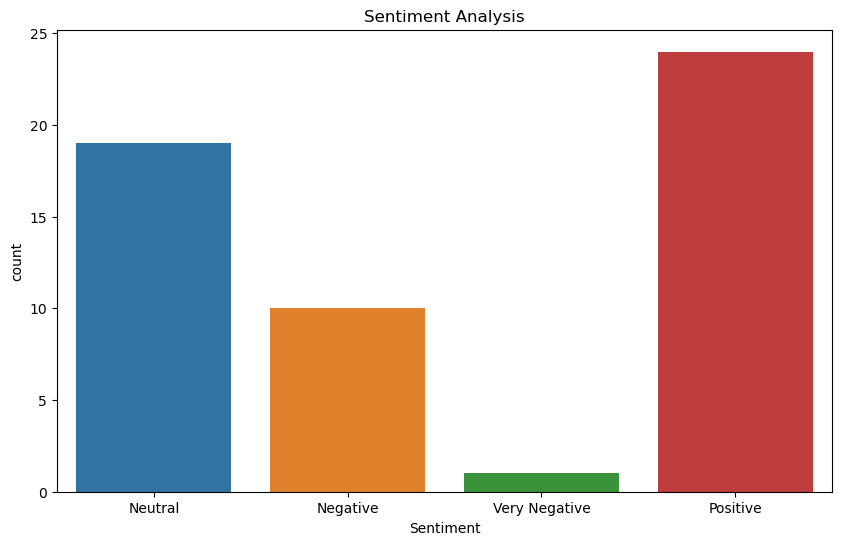

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='Sentiment')
plt.title("Sentiment Analysis")
plt.show()

/var/folders/9q/tzqjr5vx3flgd_1hhp4p63s00000gn/T/ipykernel_8435/2203198621.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = new_df.resample('D').sum()


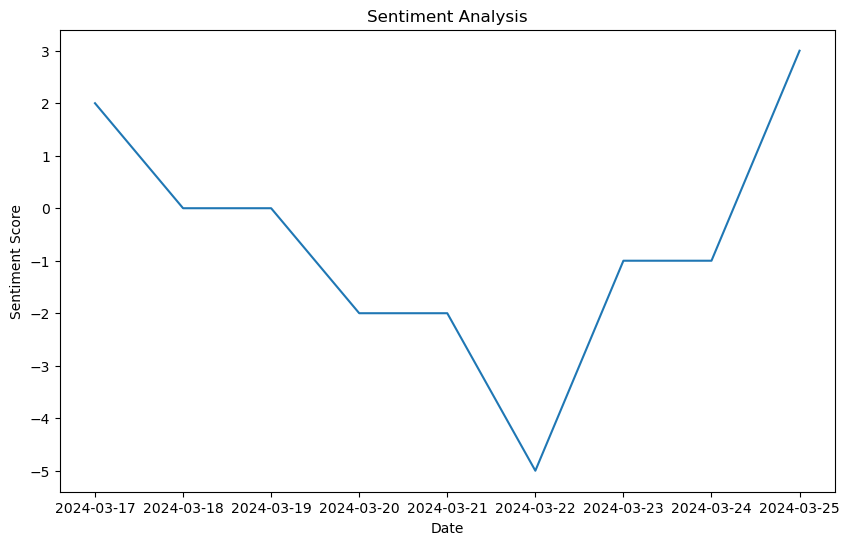

In [8]:
'''plot the number of positve and negative tweets in a time series manner taking period as 1 day'''


new_df['Sentiment'] = new_df['Sentiment'].apply(lambda x: 1 if x == 'Positive' or x == 'Very Positive' else -1)
new_df = new_df.resample('D').sum()
new_df

plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Sentiment'])
plt.title("Sentiment Analysis")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.show()

In [13]:
'''apply timeseries forecasting to predict the sentiment of the tweets for the next 2 days. new_df dataframe has datetime as the index and sentiment score as the column named 'Sentiment' '''

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

model = ARIMA(new_df['Sentiment'], order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=2)
forecast = np.round(forecast)
forecast

/Users/khush/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/khush/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-03-26 00:00:00+00:00    1.0
2024-03-27 00:00:00+00:00    3.0
Freq: D, Name: predicted_mean, dtype: float64